<a href="https://colab.research.google.com/github/SanskarGithub07/Fine-Tuning-LLMs-for-Spam-Detection-and-Emotion-Classification/blob/main/LLM_Project_2_Sanskar_Sugandhi_2210110898.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise-1

In [ ]:
!pip install tiktoken

In [ ]:
!pip install -U fsspec datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 1

In [ ]:
!pip install tiktoken transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
tor

In [ ]:
# Download the data
import urllib.request
import zipfile
import os
from pathlib import Path

url = "https://archive.ics.uci.edu/static/public/228/sms+spam+collection.zip"
zip_path = "sms_spam_collection.zip"
extracted_path = "sms_spam_collection"
data_file_path = Path(extracted_path) / "SMSSpamCollection.tsv"

def download_and_unzip_spam_data(url, zip_path, extracted_path, data_file_path):
    if data_file_path.exists():
        print(f"{data_file_path} already exists. Skipping download and extraction.")
        return

    # Downloading the file
    with urllib.request.urlopen(url) as response:
        with open(zip_path, "wb") as out_file:
            out_file.write(response.read())

    # Unzipping the file
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall(extracted_path)

    # Add .tsv file extension
    original_file_path = Path(extracted_path) / "SMSSpamCollection"
    os.rename(original_file_path, data_file_path)
    print(f"File downloaded and saved as {data_file_path}")

download_and_unzip_spam_data(url, zip_path, extracted_path, data_file_path)

File downloaded and saved as sms_spam_collection/SMSSpamCollection.tsv


In [ ]:
# Load and explore the dataset
import pandas as pd

df = pd.read_csv(data_file_path, sep="\t", header=None, names=["Label", "Text"])
df

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
print(df["Label"].value_counts())

Label
ham     4825
spam     747
Name: count, dtype: int64


In [ ]:
# Create a balanced dataset
def create_balanced_dataset(df):
    # Count the instances of "spam"
    num_spam = df[df["Label"] == "spam"].shape[0]

    # Randomly sample "ham" instances to match the number of "spam" instances
    ham_subset = df[df["Label"] == "ham"].sample(num_spam, random_state=123)

    # Combine ham "subset" with "spam"
    balanced_df = pd.concat([ham_subset, df[df["Label"] == "spam"]])

    return balanced_df

balanced_df = create_balanced_dataset(df)
print(balanced_df["Label"].value_counts())

# Map labels to integers
balanced_df["Label"] = balanced_df["Label"].map({"ham": 0, "spam": 1})
balanced_df

Label
ham     747
spam    747
Name: count, dtype: int64


,Label,Text
4307,0,Awww dat is sweet! We can think of something t...
4138,0,Just got to &lt;#&gt;
4831,0,"The word ""Checkmate"" in chess comes from the P..."
4461,0,This is wishing you a great day. Moji told me ...
5440,0,Thank you. do you generally date the brothas?
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [ ]:
# Split the dataset
def random_split(df, train_frac, validation_frac):
    # Shuffle the entire DataFrame
    df = df.sample(frac=1, random_state=123).reset_index(drop=True)

    # Calculate split indices
    train_end = int(len(df) * train_frac)
    validation_end = train_end + int(len(df) * validation_frac)

    # Split the DataFrame
    train_df = df[:train_end]
    validation_df = df[train_end:validation_end]
    test_df = df[validation_end:]

    return train_df, validation_df, test_df

train_df, validation_df, test_df = random_split(balanced_df, 0.7, 0.1)
# Save the split datasets
train_df.to_csv("train.csv", index=None)
validation_df.to_csv("validation.csv", index=None)
test_df.to_csv("test.csv", index=None)

In [ ]:
# Import SmolLM2 tokenizer from HuggingFace
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer

# Load the SmolLM2 tokenizer
tokenizer = AutoTokenizer.from_pretrained("HuggingFaceTB/SmolLM2-135M")

# If tokenizer doesn't have a padding token set, use the EOS token as padding token. Crucial when batching inputs of different lengths. Pad shorter sequences to match the length of longer sequence
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/3.66k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/801k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.10M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/831 [00:00<?, ?B/s]

In [ ]:
class SpamDataset(Dataset):
    def __init__(self, csv_file, tokenizer, max_length=None):
        self.data = pd.read_csv(csv_file)
        self.tokenizer = tokenizer

        # Pre-tokenize texts
        self.encoded_texts = [
            tokenizer.encode(text, add_special_tokens=True)
            for text in self.data["Text"]
        ]

        if max_length is None:
            self.max_length = self._longest_encoded_length() #Automatically calculate the max length of any tokenized sequence
        else:
            self.max_length = max_length
            # Truncate sequences if they are longer than max_length
            self.encoded_texts = [
                encoded_text[:self.max_length]
                for encoded_text in self.encoded_texts
            ]

        # Pad sequences to the longest sequence
        self.encoded_texts = [
            encoded_text + [tokenizer.pad_token_id] * (self.max_length - len(encoded_text))
            for encoded_text in self.encoded_texts
        ]

    def __getitem__(self, index):
        encoded = self.encoded_texts[index]
        label = self.data.iloc[index]["Label"]
        return (
            torch.tensor(encoded, dtype=torch.long),
            torch.tensor(label, dtype=torch.long)
        )

    def __len__(self):
        return len(self.data)

    def _longest_encoded_length(self):
        max_length = 0
        for encoded_text in self.encoded_texts:
            encoded_length = len(encoded_text)
            if encoded_length > max_length:
                max_length = encoded_length
        return max_length

In [ ]:
# Create datasets
train_dataset = SpamDataset(
    csv_file="train.csv",
    max_length=None,
    tokenizer=tokenizer
)

print(f"Maximum sequence length in training set: {train_dataset.max_length}")

val_dataset = SpamDataset(
    csv_file="validation.csv",
    max_length=train_dataset.max_length,
    tokenizer=tokenizer
)

test_dataset = SpamDataset(
    csv_file="test.csv",
    max_length=train_dataset.max_length,
    tokenizer=tokenizer
)

Maximum sequence length in training set: 120


In [ ]:
# Create data loaders
batch_size = 8
num_workers = 0

torch.manual_seed(123)

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    drop_last=True,
)

val_loader = DataLoader(
    dataset=val_dataset,
    batch_size=batch_size,
    num_workers=num_workers,
    drop_last=False,
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    num_workers=num_workers,
    drop_last=False,
)

In [ ]:
print("Train loader:")
for input_batch, target_batch in train_loader:
    break

print("Input batch dimensions:", input_batch.shape)
print("Label batch dimensions:", target_batch.shape)

print(f"{len(train_loader)} training batches")
print(f"{len(val_loader)} validation batches")
print(f"{len(test_loader)} test batches")

Train loader:
Input batch dimensions: torch.Size([8, 120])
Label batch dimensions: torch.Size([8])
130 training batches
19 validation batches
38 test batches


In [ ]:
from transformers import AutoModelForCausalLM

# Load SmolLM2-135M model
model_name = "HuggingFaceTB/SmolLM2-135M"
base_model = AutoModelForCausalLM.from_pretrained(model_name)

# Create a model class that wraps the pretrained model and adds a classification head
class SmolLM2Classifier(torch.nn.Module):
    def __init__(self, base_model, num_classes=2):
        super().__init__()
        self.base_model = base_model
        self.config = base_model.config

        # Freeze all parameters (gradients are not calculated for those params)
        for param in self.base_model.parameters():
            param.requires_grad = False

        # Get embedding dimension
        self.hidden_size = self.config.hidden_size

        # Add a classification head
        self.classifier = torch.nn.Linear(self.hidden_size, num_classes)

        # Unfreeze the last transformer block and layer norm
        for param in self.base_model.model.layers[-1].parameters():
            param.requires_grad = True

        for param in self.base_model.model.norm.parameters():
            param.requires_grad = True

    def forward(self, input_ids):
        # Get the output from the base model
        outputs = self.base_model(input_ids, output_hidden_states=True)

        # Get the last hidden state
        last_hidden_state = outputs.hidden_states[-1]

        # Apply the classifier to get logits
        logits = self.classifier(last_hidden_state)

        return logits

config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/269M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

In [ ]:
# Initialize the classification model
model = SmolLM2Classifier(base_model)

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
model.to(device)

Using device: cuda


SmolLM2Classifier(
  (base_model): LlamaForCausalLM(
    (model): LlamaModel(
      (embed_tokens): Embedding(49152, 576)
      (layers): ModuleList(
        (0-29): 30 x LlamaDecoderLayer(
          (self_attn): LlamaAttention(
            (q_proj): Linear(in_features=576, out_features=576, bias=False)
            (k_proj): Linear(in_features=576, out_features=192, bias=False)
            (v_proj): Linear(in_features=576, out_features=192, bias=False)
            (o_proj): Linear(in_features=576, out_features=576, bias=False)
          )
          (mlp): LlamaMLP(
            (gate_proj): Linear(in_features=576, out_features=1536, bias=False)
            (up_proj): Linear(in_features=576, out_features=1536, bias=False)
            (down_proj): Linear(in_features=1536, out_features=576, bias=False)
            (act_fn): SiLU()
          )
          (input_layernorm): LlamaRMSNorm((576,), eps=1e-05)
          (post_attention_layernorm): LlamaRMSNorm((576,), eps=1e-05)
        )
      )


In [ ]:
def calc_accuracy_loader(data_loader, model, device, num_batches=None):
    model.eval()
    correct_predictions, num_examples = 0, 0

    if num_batches is None:
        num_batches = len(data_loader)
    else:
        num_batches = min(num_batches, len(data_loader))

    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            input_batch, target_batch = input_batch.to(device), target_batch.to(device)

            with torch.no_grad():
                logits = model(input_batch)[:, -1, :]  # Logits of last output token
            predicted_labels = torch.argmax(logits, dim=-1)

            num_examples += predicted_labels.shape[0]
            correct_predictions += (predicted_labels == target_batch).sum().item()
        else:
            break

    return correct_predictions / num_examples

def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch, target_batch = input_batch.to(device), target_batch.to(device)
    logits = model(input_batch)[:, -1, :]  # Logits of last output token
    loss = torch.nn.functional.cross_entropy(logits, target_batch)
    return loss

def calc_loss_loader(data_loader, model, device, num_batches=None):
    total_loss = 0.
    if len(data_loader) == 0:
        return float("nan")
    elif num_batches is None:
        num_batches = len(data_loader)
    else:
        num_batches = min(num_batches, len(data_loader))

    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            total_loss += loss.item()
        else:
            break

    return total_loss / num_batches

In [ ]:
# Check initial performance
with torch.no_grad():
    train_loss = calc_loss_loader(train_loader, model, device, num_batches=5)
    val_loss = calc_loss_loader(val_loader, model, device, num_batches=5)
    test_loss = calc_loss_loader(test_loader, model, device, num_batches=5)

print(f"Initial training loss: {train_loss:.3f}")
print(f"Initial validation loss: {val_loss:.3f}")
print(f"Initial test loss: {test_loss:.3f}")

train_accuracy = calc_accuracy_loader(train_loader, model, device, num_batches=10)
val_accuracy = calc_accuracy_loader(val_loader, model, device, num_batches=10)
test_accuracy = calc_accuracy_loader(test_loader, model, device, num_batches=10)

print(f"Initial training accuracy: {train_accuracy*100:.2f}%")
print(f"Initial validation accuracy: {val_accuracy*100:.2f}%")
print(f"Initial test accuracy: {test_accuracy*100:.2f}%")

Initial training loss: 0.759
Initial validation loss: 1.155
Initial test loss: 1.302
Initial training accuracy: 65.00%
Initial validation accuracy: 67.50%
Initial test accuracy: 62.50%


In [ ]:
def evaluate_model(model, train_loader, val_loader, device, eval_iter):
    model.eval()
    with torch.no_grad():
        train_loss = calc_loss_loader(train_loader, model, device, num_batches=eval_iter)
        val_loss = calc_loss_loader(val_loader, model, device, num_batches=eval_iter)
    model.train()
    return train_loss, val_loss

def train_classifier_simple(model, train_loader, val_loader, optimizer, device, num_epochs,
                            eval_freq, eval_iter):
    # Initialize lists to track losses and examples seen
    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    examples_seen, global_step = 0, -1

    # Main training loop
    for epoch in range(num_epochs):
        model.train()  # Set model to training mode

        for input_batch, target_batch in train_loader:
            optimizer.zero_grad() # Reset loss gradients from previous batch iteration
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            loss.backward() # Calculate loss gradients
            optimizer.step() # Update model weights using loss gradients
            examples_seen += input_batch.shape[0] # Track examples instead of tokens
            global_step += 1

            # Optional evaluation step
            if global_step % eval_freq == 0:
                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter)
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                print(f"Ep {epoch+1} (Step {global_step:06d}): "
                      f"Train loss {train_loss:.3f}, Val loss {val_loss:.3f}")

        # Calculate accuracy after each epoch
        train_accuracy = calc_accuracy_loader(train_loader, model, device, num_batches=eval_iter)
        val_accuracy = calc_accuracy_loader(val_loader, model, device, num_batches=eval_iter)
        print(f"Training accuracy: {train_accuracy*100:.2f}% | ", end="")
        print(f"Validation accuracy: {val_accuracy*100:.2f}%")
        train_accs.append(train_accuracy)
        val_accs.append(val_accuracy)

    return train_losses, val_losses, train_accs, val_accs, examples_seen

In [ ]:
import time

start_time = time.time()

torch.manual_seed(123)

# Create optimizer - note we're only optimizing the classifier parameters and unfrozen layers
optimizer = torch.optim.AdamW(
    [p for p in model.parameters() if p.requires_grad],
    lr=5e-5,
    weight_decay=0.1 #Regularization term penalizes large weights prevents overfitting
)

num_epochs = 5
train_losses, val_losses, train_accs, val_accs, examples_seen = train_classifier_simple(
    model, train_loader, val_loader, optimizer, device,
    num_epochs=num_epochs, eval_freq=50, eval_iter=5,
)

end_time = time.time()
execution_time_minutes = (end_time - start_time) / 60
print(f"Training completed in {execution_time_minutes:.2f} minutes.")

Ep 1 (Step 000000): Train loss 0.944, Val loss 1.096
Ep 1 (Step 000050): Train loss 0.377, Val loss 0.387
Ep 1 (Step 000100): Train loss 0.287, Val loss 0.327
Training accuracy: 90.00% | Validation accuracy: 90.00%
Ep 2 (Step 000150): Train loss 0.436, Val loss 0.295
Ep 2 (Step 000200): Train loss 0.281, Val loss 0.288
Ep 2 (Step 000250): Train loss 0.304, Val loss 0.283
Training accuracy: 82.50% | Validation accuracy: 90.00%
Ep 3 (Step 000300): Train loss 0.354, Val loss 0.271
Ep 3 (Step 000350): Train loss 0.362, Val loss 0.270
Training accuracy: 90.00% | Validation accuracy: 90.00%
Ep 4 (Step 000400): Train loss 0.162, Val loss 0.307
Ep 4 (Step 000450): Train loss 0.307, Val loss 0.264
Ep 4 (Step 000500): Train loss 0.375, Val loss 0.264
Training accuracy: 92.50% | Validation accuracy: 90.00%
Ep 5 (Step 000550): Train loss 0.251, Val loss 0.268
Ep 5 (Step 000600): Train loss 0.367, Val loss 0.251
Training accuracy: 90.00% | Validation accuracy: 90.00%
Training completed in 1.26 minu

In [ ]:
import matplotlib.pyplot as plt

def plot_values(epochs_seen, examples_seen, train_values, val_values, label="loss"):
    fig, ax1 = plt.subplots(figsize=(5, 3))

    # Plot training and validation loss against epochs
    ax1.plot(epochs_seen, train_values, label=f"Training {label}")
    ax1.plot(epochs_seen, val_values, linestyle="-.", label=f"Validation {label}")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel(label.capitalize())
    ax1.legend()

    # Create a second x-axis for examples seen
    ax2 = ax1.twiny()  # Create a second x-axis that shares the same y-axis
    ax2.plot(examples_seen, train_values, alpha=0)  # Invisible plot for aligning ticks
    ax2.set_xlabel("Examples seen")

    fig.tight_layout()  # Adjust layout to make room
    plt.savefig(f"smollm2_{label}-plot.pdf")
    plt.show()

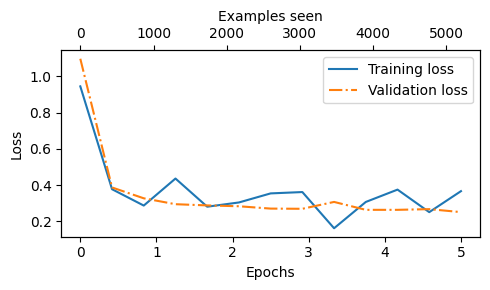

In [ ]:
epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
examples_seen_tensor = torch.linspace(0, examples_seen, len(train_losses))

plot_values(epochs_tensor, examples_seen_tensor, train_losses, val_losses)

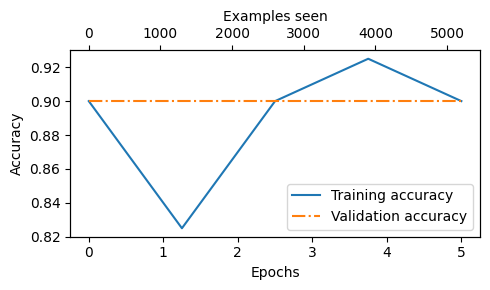

In [ ]:
epochs_tensor = torch.linspace(0, num_epochs, len(train_accs))
examples_seen_tensor = torch.linspace(0, examples_seen, len(train_accs))

plot_values(epochs_tensor, examples_seen_tensor, train_accs, val_accs, label="accuracy")

In [ ]:
# Calculate final performance on full datasets
train_accuracy = calc_accuracy_loader(train_loader, model, device)
val_accuracy = calc_accuracy_loader(val_loader, model, device)
test_accuracy = calc_accuracy_loader(test_loader, model, device)

print(f"Final training accuracy: {train_accuracy*100:.2f}%")
print(f"Final validation accuracy: {val_accuracy*100:.2f}%")
print(f"Final test accuracy: {test_accuracy*100:.2f}%")

Final training accuracy: 87.60%
Final validation accuracy: 91.28%
Final test accuracy: 86.33%


In [ ]:
def classify_text(text, model, tokenizer, device, max_length=None):
    model.eval()

    # Tokenize the input text
    input_ids = tokenizer.encode(text, add_special_tokens=True)

    # Truncate if needed
    if max_length is not None:
        input_ids = input_ids[:max_length]

    # Pad if needed
    if max_length is not None and len(input_ids) < max_length:
        input_ids += [tokenizer.pad_token_id] * (max_length - len(input_ids))

    # Convert to tensor and add batch dimension
    input_tensor = torch.tensor(input_ids, device=device).unsqueeze(0)

    # Model inference
    with torch.no_grad():
        logits = model(input_tensor)[:, -1, :]  # Logits of the last output token

    predicted_label = torch.argmax(logits, dim=-1).item()

    # Return the classified result
    return "spam" if predicted_label == 1 else "not spam"

In [ ]:
text_examples = [
    "You are a winner you have been specially selected to receive $1000 cash or a $2000 award.",
    "Hey, just wanted to check if we're still on for dinner tonight? Let me know!",
    "URGENT! You have won a 1-week FREE membership in our £100,000 Prize Jackpot! Text the word: CLAIM to 81010",
    "I'll be there in about 15 minutes. See you soon.",
    "Congratulations! You've been selected for a free iPhone 13. Click here to claim now!",
    "Can you pick up some milk on your way home? Thanks."
]

for text in text_examples:
    result = classify_text(text, model, tokenizer, device, max_length=train_dataset.max_length)
    print(f"Text: {text}\nClassification: {result}\n")

Text: You are a winner you have been specially selected to receive $1000 cash or a $2000 award.
Classification: not spam

Text: Hey, just wanted to check if we're still on for dinner tonight? Let me know!
Classification: not spam

Text: URGENT! You have won a 1-week FREE membership in our £100,000 Prize Jackpot! Text the word: CLAIM to 81010
Classification: spam

Text: I'll be there in about 15 minutes. See you soon.
Classification: not spam

Text: Congratulations! You've been selected for a free iPhone 13. Click here to claim now!
Classification: not spam

Text: Can you pick up some milk on your way home? Thanks.
Classification: not spam



In [ ]:
# Save the model for later use
torch.save(model.state_dict(), "smollm2_spam_classifier.pth")

print("Model saved successfully! You can reload it with:")
print("""
# Load the saved model
model = SmolLM2Classifier(base_model)  # Initialize the model structure first
model.load_state_dict(torch.load("smollm2_spam_classifier.pth"))
model.eval()
""")

Model saved successfully! You can reload it with:

# Load the saved model
model = SmolLM2Classifier(base_model)  # Initialize the model structure first
model.load_state_dict(torch.load("smollm2_spam_classifier.pth"))
model.eval()



# Exercise-2

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForCausalLM
from datasets import load_dataset

# Load the emotion dataset
print("Loading emotion dataset...")
dataset = load_dataset("emotion")
print(dataset)

Loading emotion dataset...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


In [ ]:
# Get dataset statistics
def get_dataset_stats(dataset):
    # Count occurrences of each label in train set
    label_counts = {}
    for item in dataset["train"]:
        label = item["label"]
        label_counts[label] = label_counts.get(label, 0) + 1

    # Sort labels by frequency
    sorted_labels = sorted(label_counts.items(), key=lambda x: x[1], reverse=True)

    # Get label names
    label_names = dataset["train"].features["label"].names
    print("Label mapping:", {i: name for i, name in enumerate(label_names)})

    # Print statistics
    print("\nLabel distribution in training set:")
    for label_id, count in sorted_labels:
        print(f"{label_names[label_id]}: {count} samples ({count/len(dataset['train'])*100:.2f}%)")

    return label_names, sorted_labels

label_names, sorted_labels = get_dataset_stats(dataset)
label_names, sorted_labels

Label mapping: {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

Label distribution in training set:
joy: 5362 samples (33.51%)
sadness: 4666 samples (29.16%)
anger: 2159 samples (13.49%)
fear: 1937 samples (12.11%)
love: 1304 samples (8.15%)
surprise: 572 samples (3.57%)


(['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'],
 [(1, 5362), (0, 4666), (3, 2159), (4, 1937), (2, 1304), (5, 572)])

In [ ]:
# Select top 4 emotions for our classification task
top_emotions = [label_id for label_id, _ in sorted_labels[:4]]
print(f"\nWe'll use these 4 emotions for classification: {[label_names[i] for i in top_emotions]}")


We'll use these 4 emotions for classification: ['joy', 'sadness', 'anger', 'fear']


In [ ]:
# Filter dataset to only include the top 4 emotions
def filter_top_emotions(example):
    return example["label"] in top_emotions

filtered_train = dataset["train"].filter(filter_top_emotions)
filtered_validation = dataset["validation"].filter(filter_top_emotions)
filtered_test = dataset["test"].filter(filter_top_emotions)

print(f"Filtered train set: {len(filtered_train)} samples")
print(f"Filtered validation set: {len(filtered_validation)} samples")
print(f"Filtered test set: {len(filtered_test)} samples")

# Create label mapping for the filtered dataset (0-3)
emotion_id_mapping = {old_id: new_id for new_id, old_id in enumerate(top_emotions)}

# Map old label IDs to new consecutive label IDs
def map_labels(example):
    example["new_label"] = emotion_id_mapping[example["label"]]
    return example

filtered_train = filtered_train.map(map_labels)
filtered_validation = filtered_validation.map(map_labels)
filtered_test = filtered_test.map(map_labels)

filtered_train, filtered_test, filtered_validation

Filter:   0%|          | 0/16000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2000 [00:00<?, ? examples/s]

Filtered train set: 14124 samples
Filtered validation set: 1741 samples
Filtered test set: 1775 samples


Map:   0%|          | 0/14124 [00:00<?, ? examples/s]

Map:   0%|          | 0/1741 [00:00<?, ? examples/s]

Map:   0%|          | 0/1775 [00:00<?, ? examples/s]

(Dataset({
     features: ['text', 'label', 'new_label'],
     num_rows: 14124
 }),
 Dataset({
     features: ['text', 'label', 'new_label'],
     num_rows: 1775
 }),
 Dataset({
     features: ['text', 'label', 'new_label'],
     num_rows: 1741
 }))

In [ ]:
# Create balanced dataset
def create_balanced_dataset(dataset):
    # Find the minimum count among all classes
    label_counts = {}
    for item in dataset:
        label = item["new_label"]
        label_counts[label] = label_counts.get(label, 0) + 1

    min_count = min(label_counts.values())

    # Group examples by label
    grouped_examples = {label: [] for label in label_counts.keys()}
    for item in dataset:
        grouped_examples[item["new_label"]].append(item)

    # Sample min_count examples from each class
    balanced_examples = []
    for label, examples in grouped_examples.items():
        sampled_examples = examples[:min_count]  # Take first min_count examples
        balanced_examples.extend(sampled_examples)

    # Convert to pandas DataFrame
    balanced_df = pd.DataFrame({
        "Text": [item["text"] for item in balanced_examples],
        "Label": [item["new_label"] for item in balanced_examples]
    })

    return balanced_df

# Create balanced datasets
balanced_train_df = create_balanced_dataset(filtered_train)
balanced_val_df = create_balanced_dataset(filtered_validation)
balanced_test_df = create_balanced_dataset(filtered_test)

print(f"Balanced train set: {len(balanced_train_df)} samples")
print(f"Balanced validation set: {len(balanced_val_df)} samples")
print(f"Balanced test set: {len(balanced_test_df)} samples")

# Display class distribution in balanced train set
print(balanced_train_df["Label"].value_counts())

Balanced train set: 7748 samples
Balanced validation set: 848 samples
Balanced test set: 896 samples
Label
1    1937
2    1937
3    1937
0    1937
Name: count, dtype: int64


In [ ]:
# Save the balanced datasets
balanced_train_df.to_csv("train.csv", index=None)
balanced_val_df.to_csv("validation.csv", index=None)
balanced_test_df.to_csv("test.csv", index=None)

# Get emotion names for the new label mapping
new_label_names = [label_names[old_id] for old_id in top_emotions]
print(f"New label mapping: {dict(enumerate(new_label_names))}")

New label mapping: {0: 'joy', 1: 'sadness', 2: 'anger', 3: 'fear'}


In [ ]:
# Load the SmolLM2 tokenizer
tokenizer = AutoTokenizer.from_pretrained("HuggingFaceTB/SmolLM2-135M")

# If tokenizer doesn't have a padding token set, use the EOS token as padding token
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

class EmotionDataset(Dataset):
    def __init__(self, csv_file, tokenizer, max_length=None):
        self.data = pd.read_csv(csv_file)
        self.tokenizer = tokenizer

        # Pre-tokenize texts
        self.encoded_texts = [
            tokenizer.encode(text, add_special_tokens=True)
            for text in self.data["Text"]
        ]

        if max_length is None:
            self.max_length = self._longest_encoded_length()
        else:
            self.max_length = max_length
            # Truncate sequences if they are longer than max_length
            self.encoded_texts = [
                encoded_text[:self.max_length]
                for encoded_text in self.encoded_texts
            ]

        # Pad sequences to the longest sequence
        self.encoded_texts = [
            encoded_text + [tokenizer.pad_token_id] * (self.max_length - len(encoded_text))
            for encoded_text in self.encoded_texts
        ]

    def __getitem__(self, index):
        encoded = self.encoded_texts[index]
        label = self.data.iloc[index]["Label"]
        return (
            torch.tensor(encoded, dtype=torch.long),
            torch.tensor(label, dtype=torch.long)
        )

    def __len__(self):
        return len(self.data)

    def _longest_encoded_length(self):
        max_length = 0
        for encoded_text in self.encoded_texts:
            encoded_length = len(encoded_text)
            if encoded_length > max_length:
                max_length = encoded_length
        return max_length

# Create datasets
train_dataset = EmotionDataset(
    csv_file="train.csv",
    max_length=None,
    tokenizer=tokenizer
)

print(f"Maximum sequence length in training set: {train_dataset.max_length}")

val_dataset = EmotionDataset(
    csv_file="validation.csv",
    max_length=train_dataset.max_length,
    tokenizer=tokenizer
)

test_dataset = EmotionDataset(
    csv_file="test.csv",
    max_length=train_dataset.max_length,
    tokenizer=tokenizer
)

# Create data loaders
batch_size = 16  # Increased batch size since emotion texts are typically shorter
num_workers = 0

torch.manual_seed(123)

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=num_workers,
    drop_last=True,
)

val_loader = DataLoader(
    dataset=val_dataset,
    batch_size=batch_size,
    num_workers=num_workers,
    drop_last=False,
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    num_workers=num_workers,
    drop_last=False,
)

# Verify dataset and loader dimensions
print("Train loader:")
for input_batch, target_batch in train_loader:
    break

print("Input batch dimensions:", input_batch.shape)
print("Label batch dimensions:", target_batch.shape)

print(f"{len(train_loader)} training batches")
print(f"{len(val_loader)} validation batches")
print(f"{len(test_loader)} test batches")

tokenizer_config.json:   0%|          | 0.00/3.66k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/801k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.10M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/831 [00:00<?, ?B/s]

Maximum sequence length in training set: 88
Train loader:
Input batch dimensions: torch.Size([16, 88])
Label batch dimensions: torch.Size([16])
484 training batches
53 validation batches
56 test batches


In [ ]:
# Load SmolLM2-135M model
model_name = "HuggingFaceTB/SmolLM2-135M"
base_model = AutoModelForCausalLM.from_pretrained(model_name)

# Create a model class that wraps the pretrained model and adds a classification head
class SmolLM2Classifier(torch.nn.Module):
    def __init__(self, base_model, num_classes=4):  # Changed to 4 classes for emotion
        super().__init__()
        self.base_model = base_model
        self.config = base_model.config

        # Freeze all parameters
        for param in self.base_model.parameters():
            param.requires_grad = False

        # Get embedding dimension
        self.hidden_size = self.config.hidden_size

        # Add a classification head
        self.classifier = torch.nn.Linear(self.hidden_size, num_classes)

        # Unfreeze the last transformer block and layer norm
        for param in self.base_model.model.layers[-1].parameters():
            param.requires_grad = True

        for param in self.base_model.model.norm.parameters():
            param.requires_grad = True

    def forward(self, input_ids):
        # Get the output from the base model
        outputs = self.base_model(input_ids, output_hidden_states=True)

        # Get the last hidden state
        last_hidden_state = outputs.hidden_states[-1]

        # Apply the classifier to get logits
        logits = self.classifier(last_hidden_state)

        return logits

# Initialize the classification model
model = SmolLM2Classifier(base_model, num_classes=4)  # 4 emotion classes

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
model.to(device)

config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/269M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

Using device: cuda


SmolLM2Classifier(
  (base_model): LlamaForCausalLM(
    (model): LlamaModel(
      (embed_tokens): Embedding(49152, 576)
      (layers): ModuleList(
        (0-29): 30 x LlamaDecoderLayer(
          (self_attn): LlamaAttention(
            (q_proj): Linear(in_features=576, out_features=576, bias=False)
            (k_proj): Linear(in_features=576, out_features=192, bias=False)
            (v_proj): Linear(in_features=576, out_features=192, bias=False)
            (o_proj): Linear(in_features=576, out_features=576, bias=False)
          )
          (mlp): LlamaMLP(
            (gate_proj): Linear(in_features=576, out_features=1536, bias=False)
            (up_proj): Linear(in_features=576, out_features=1536, bias=False)
            (down_proj): Linear(in_features=1536, out_features=576, bias=False)
            (act_fn): SiLU()
          )
          (input_layernorm): LlamaRMSNorm((576,), eps=1e-05)
          (post_attention_layernorm): LlamaRMSNorm((576,), eps=1e-05)
        )
      )


In [ ]:
def calc_accuracy_loader(data_loader, model, device, num_batches=None):
    model.eval()
    correct_predictions, num_examples = 0, 0

    if num_batches is None:
        num_batches = len(data_loader)
    else:
        num_batches = min(num_batches, len(data_loader))

    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            input_batch, target_batch = input_batch.to(device), target_batch.to(device)

            with torch.no_grad():
                logits = model(input_batch)[:, -1, :]  # Logits of last output token
            predicted_labels = torch.argmax(logits, dim=-1)

            num_examples += predicted_labels.shape[0]
            correct_predictions += (predicted_labels == target_batch).sum().item()
        else:
            break

    return correct_predictions / num_examples

def calc_loss_batch(input_batch, target_batch, model, device):
    input_batch, target_batch = input_batch.to(device), target_batch.to(device)
    logits = model(input_batch)[:, -1, :]  # Logits of last output token
    loss = torch.nn.functional.cross_entropy(logits, target_batch)
    return loss

def calc_loss_loader(data_loader, model, device, num_batches=None):
    total_loss = 0.
    if len(data_loader) == 0:
        return float("nan")
    elif num_batches is None:
        num_batches = len(data_loader)
    else:
        num_batches = min(num_batches, len(data_loader))

    for i, (input_batch, target_batch) in enumerate(data_loader):
        if i < num_batches:
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            total_loss += loss.item()
        else:
            break

    return total_loss / num_batches

In [ ]:
# Check initial performance
with torch.no_grad():
    train_loss = calc_loss_loader(train_loader, model, device, num_batches=5)
    val_loss = calc_loss_loader(val_loader, model, device, num_batches=5)
    test_loss = calc_loss_loader(test_loader, model, device, num_batches=5)

print(f"Initial training loss: {train_loss:.3f}")
print(f"Initial validation loss: {val_loss:.3f}")
print(f"Initial test loss: {test_loss:.3f}")

train_accuracy = calc_accuracy_loader(train_loader, model, device, num_batches=10)
val_accuracy = calc_accuracy_loader(val_loader, model, device, num_batches=10)
test_accuracy = calc_accuracy_loader(test_loader, model, device, num_batches=10)

print(f"Initial training accuracy: {train_accuracy*100:.2f}%")
print(f"Initial validation accuracy: {val_accuracy*100:.2f}%")
print(f"Initial test accuracy: {test_accuracy*100:.2f}%")

Initial training loss: 2.240
Initial validation loss: 0.940
Initial test loss: 0.701
Initial training accuracy: 27.50%
Initial validation accuracy: 60.00%
Initial test accuracy: 62.50%


In [ ]:
def evaluate_model(model, train_loader, val_loader, device, eval_iter):
    model.eval()
    with torch.no_grad():
        train_loss = calc_loss_loader(train_loader, model, device, num_batches=eval_iter)
        val_loss = calc_loss_loader(val_loader, model, device, num_batches=eval_iter)
    model.train()
    return train_loss, val_loss

def train_classifier_simple(model, train_loader, val_loader, optimizer, device, num_epochs,
                            eval_freq, eval_iter):
    # Initialize lists to track losses and examples seen
    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    examples_seen, global_step = 0, -1

    # Main training loop
    for epoch in range(num_epochs):
        model.train()  # Set model to training mode

        for input_batch, target_batch in train_loader:
            optimizer.zero_grad() # Reset loss gradients from previous batch iteration
            loss = calc_loss_batch(input_batch, target_batch, model, device)
            loss.backward() # Calculate loss gradients
            optimizer.step() # Update model weights using loss gradients
            examples_seen += input_batch.shape[0] # Track examples instead of tokens
            global_step += 1

            # Optional evaluation step
            if global_step % eval_freq == 0:
                train_loss, val_loss = evaluate_model(
                    model, train_loader, val_loader, device, eval_iter)
                train_losses.append(train_loss)
                val_losses.append(val_loss)
                print(f"Ep {epoch+1} (Step {global_step:06d}): "
                      f"Train loss {train_loss:.3f}, Val loss {val_loss:.3f}")

        # Calculate accuracy after each epoch
        train_accuracy = calc_accuracy_loader(train_loader, model, device, num_batches=eval_iter)
        val_accuracy = calc_accuracy_loader(val_loader, model, device, num_batches=eval_iter)
        print(f"Training accuracy: {train_accuracy*100:.2f}% | ", end="")
        print(f"Validation accuracy: {val_accuracy*100:.2f}%")
        train_accs.append(train_accuracy)
        val_accs.append(val_accuracy)

    return train_losses, val_losses, train_accs, val_accs, examples_seen

In [ ]:
# Train the model
import time

start_time = time.time()

torch.manual_seed(123)

# Create optimizer - note we're only optimizing the classifier parameters and unfrozen layers
optimizer = torch.optim.AdamW(
    [p for p in model.parameters() if p.requires_grad],
    lr=5e-5,
    weight_decay=0.1
)

num_epochs = 5
train_losses, val_losses, train_accs, val_accs, examples_seen = train_classifier_simple(
    model, train_loader, val_loader, optimizer, device,
    num_epochs=num_epochs, eval_freq=50, eval_iter=5,
)

end_time = time.time()
execution_time_minutes = (end_time - start_time) / 60
print(f"Training completed in {execution_time_minutes:.2f} minutes.")

Ep 1 (Step 000000): Train loss 2.231, Val loss 0.943
Ep 1 (Step 000050): Train loss 1.375, Val loss 1.516
Ep 1 (Step 000100): Train loss 1.461, Val loss 1.463
Ep 1 (Step 000150): Train loss 1.391, Val loss 1.363
Ep 1 (Step 000200): Train loss 1.403, Val loss 1.425
Ep 1 (Step 000250): Train loss 1.389, Val loss 1.379
Ep 1 (Step 000300): Train loss 1.379, Val loss 1.439
Ep 1 (Step 000350): Train loss 1.386, Val loss 1.417
Ep 1 (Step 000400): Train loss 1.371, Val loss 1.260
Ep 1 (Step 000450): Train loss 1.383, Val loss 1.346
Training accuracy: 17.50% | Validation accuracy: 40.00%
Ep 2 (Step 000500): Train loss 1.393, Val loss 1.392
Ep 2 (Step 000550): Train loss 1.380, Val loss 1.444
Ep 2 (Step 000600): Train loss 1.376, Val loss 1.301
Ep 2 (Step 000650): Train loss 1.420, Val loss 1.300
Ep 2 (Step 000700): Train loss 1.391, Val loss 1.307
Ep 2 (Step 000750): Train loss 1.379, Val loss 1.325
Ep 2 (Step 000800): Train loss 1.388, Val loss 1.407
Ep 2 (Step 000850): Train loss 1.385, Val l

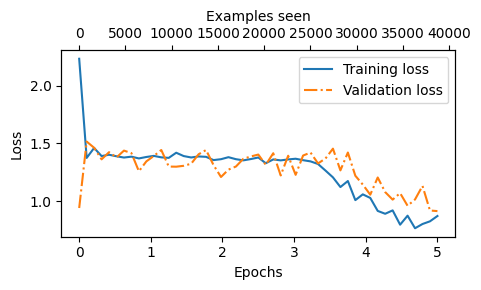

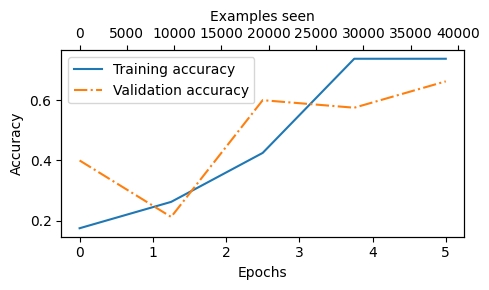

In [ ]:
import matplotlib.pyplot as plt

def plot_values(epochs_seen, examples_seen, train_values, val_values, label="loss"):
    fig, ax1 = plt.subplots(figsize=(5, 3))

    # Plot training and validation loss against epochs
    ax1.plot(epochs_seen, train_values, label=f"Training {label}")
    ax1.plot(epochs_seen, val_values, linestyle="-.", label=f"Validation {label}")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel(label.capitalize())
    ax1.legend()

    # Create a second x-axis for examples seen
    ax2 = ax1.twiny()  # Create a second x-axis that shares the same y-axis
    ax2.plot(examples_seen, train_values, alpha=0)  # Invisible plot for aligning ticks
    ax2.set_xlabel("Examples seen")

    fig.tight_layout()  # Adjust layout to make room
    plt.savefig(f"smollm2_emotion_{label}-plot.pdf")
    plt.show()

epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
examples_seen_tensor = torch.linspace(0, examples_seen, len(train_losses))

plot_values(epochs_tensor, examples_seen_tensor, train_losses, val_losses)

epochs_tensor = torch.linspace(0, num_epochs, len(train_accs))
examples_seen_tensor = torch.linspace(0, examples_seen, len(train_accs))

plot_values(epochs_tensor, examples_seen_tensor, train_accs, val_accs, label="accuracy")

In [ ]:
# Calculate final performance on full datasets
train_accuracy = calc_accuracy_loader(train_loader, model, device)
val_accuracy = calc_accuracy_loader(val_loader, model, device)
test_accuracy = calc_accuracy_loader(test_loader, model, device)

print(f"Final training accuracy: {train_accuracy*100:.2f}%")
print(f"Final validation accuracy: {val_accuracy*100:.2f}%")
print(f"Final test accuracy: {test_accuracy*100:.2f}%")

Final training accuracy: 77.20%
Final validation accuracy: 76.89%
Final test accuracy: 77.23%


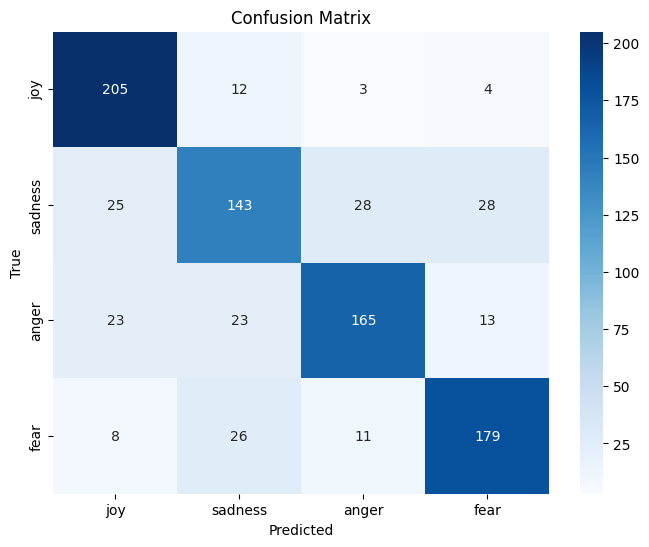

In [ ]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

def create_confusion_matrix(model, data_loader, device, class_names):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for input_batch, target_batch in data_loader:
            input_batch, target_batch = input_batch.to(device), target_batch.to(device)
            logits = model(input_batch)[:, -1, :]
            predicted_labels = torch.argmax(logits, dim=-1)

            all_preds.extend(predicted_labels.cpu().numpy())
            all_labels.extend(target_batch.cpu().numpy())

    # Create confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.savefig("emotion_confusion_matrix.pdf")
    plt.show()

    return cm

# Create confusion matrix for test set
cm = create_confusion_matrix(model, test_loader, device, new_label_names)

In [ ]:
def classify_emotion(text, model, tokenizer, device, max_length=None, emotion_names=None):
    model.eval()

    # Tokenize the input text
    input_ids = tokenizer.encode(text, add_special_tokens=True)

    # Truncate if needed
    if max_length is not None:
        input_ids = input_ids[:max_length]

    # Pad if needed
    if max_length is not None and len(input_ids) < max_length:
        input_ids += [tokenizer.pad_token_id] * (max_length - len(input_ids))

    # Convert to tensor and add batch dimension
    input_tensor = torch.tensor(input_ids, device=device).unsqueeze(0)

    # Model inference
    with torch.no_grad():
        logits = model(input_tensor)[:, -1, :]  # Logits of the last output token

    # Get probabilities
    probs = torch.nn.functional.softmax(logits, dim=-1)
    predicted_label = torch.argmax(logits, dim=-1).item()

    # Return the predicted emotion and confidence
    emotion = emotion_names[predicted_label] if emotion_names else str(predicted_label)
    confidence = probs[0][predicted_label].item()

    return emotion, confidence

# Test the classifier with example messages
text_examples = [
    "I feel so happy today, everything is going well!",
    "I can't believe they would do this to me, I'm so angry right now.",
    "My heart is broken, I can't stop crying after what happened.",
    "I love spending time with my family, they bring me so much joy.",
    "That horror movie was so scary, I couldn't sleep all night.",
    "I miss you so much, can't wait to see you again."
]

print("Emotion Classification Results:")
print("-" * 60)
for text in text_examples:
    emotion, confidence = classify_emotion(text, model, tokenizer, device,
                                          max_length=train_dataset.max_length,
                                          emotion_names=new_label_names)
    print(f"Text: {text}")
    print(f"Predicted emotion: {emotion} (confidence: {confidence:.2f})")
    print("-" * 60)

Emotion Classification Results:
------------------------------------------------------------
Text: I feel so happy today, everything is going well!
Predicted emotion: joy (confidence: 0.93)
------------------------------------------------------------
Text: I can't believe they would do this to me, I'm so angry right now.
Predicted emotion: anger (confidence: 0.49)
------------------------------------------------------------
Text: My heart is broken, I can't stop crying after what happened.
Predicted emotion: sadness (confidence: 0.49)
------------------------------------------------------------
Text: I love spending time with my family, they bring me so much joy.
Predicted emotion: joy (confidence: 0.80)
------------------------------------------------------------
Text: That horror movie was so scary, I couldn't sleep all night.
Predicted emotion: fear (confidence: 0.32)
------------------------------------------------------------
Text: I miss you so much, can't wait to see you again.


In [ ]:
# Save the model for later use
torch.save(model.state_dict(), "smollm2_emotion_classifier.pth")

print("Model saved successfully! You can reload it with:")
print("""
# Load the saved model
model = SmolLM2Classifier(base_model, num_classes=4)  # Initialize the model structure first
model.load_state_dict(torch.load("smollm2_emotion_classifier.pth"))
model.eval()
""")

# Print final information about the dataset and model
print("\nFinal model summary:")
print(f"Dataset: Emotion classification (subset of 4 emotions)")
print(f"Classes: {new_label_names}")
print(f"Model: SmolLM2-135M with classification head")
print(f"Final test accuracy: {test_accuracy*100:.2f}%")

Model saved successfully! You can reload it with:

# Load the saved model
model = SmolLM2Classifier(base_model, num_classes=4)  # Initialize the model structure first
model.load_state_dict(torch.load("smollm2_emotion_classifier.pth"))
model.eval()


Final model summary:
Dataset: Emotion classification (subset of 4 emotions)
Classes: ['joy', 'sadness', 'anger', 'fear']
Model: SmolLM2-135M with classification head
Final test accuracy: 77.23%
